## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  44.185939  1456.229761  0.053497  9.709325  0.958251
1   7.916623  1289.031179  0.735477  4.203711  1.470055
2  69.163117  1024.353053  0.639591  6.095448  1.538256
3  69.227433  1014.638502  0.504640  3.476594  1.217939
4  66.434504  1649.873612  0.680119  5.399699  1.486854


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 1.0340988	total: 53.5ms	remaining: 53.4s
1:	learn: 1.0224248	total: 54.5ms	remaining: 27.2s
2:	learn: 1.0106328	total: 55.1ms	remaining: 18.3s
3:	learn: 0.9990819	total: 55.8ms	remaining: 13.9s
4:	learn: 0.9854472	total: 56.6ms	remaining: 11.3s
5:	learn: 0.9727693	total: 57.7ms	remaining: 9.56s
6:	learn: 0.9603509	total: 59.1ms	remaining: 8.39s
7:	learn: 0.9507162	total: 60.8ms	remaining: 7.53s
8:	learn: 0.9387660	total: 62.7ms	remaining: 6.9s
9:	learn: 0.9273385	total: 64ms	remaining: 6.33s
10:	learn: 0.9178135	total: 65.3ms	remaining: 5.87s
11:	learn: 0.9060801	total: 66.2ms	remaining: 5.45s
12:	learn: 0.8968252	total: 67.6ms	remaining: 5.13s
13:	learn: 0.8864352	total: 68.6ms	remaining: 4.83s
14:	learn: 0.8757767	total: 70.2ms	remaining: 4.61s
15:	learn: 0.8647541	total: 72.1ms	remaining: 4.43s
16:	learn: 0.8558143	total: 73.2ms	remaining: 4.23s
17:	learn: 0.8456128	total: 74.7ms	remaining: 4.08s
18:	learn: 0.8362664	total: 75.3ms	remaining: 3.89s
19:	learn: 0.8263005	tota

139:	learn: 0.3081289	total: 144ms	remaining: 887ms
140:	learn: 0.3063374	total: 146ms	remaining: 889ms
141:	learn: 0.3044231	total: 147ms	remaining: 889ms
142:	learn: 0.3028876	total: 148ms	remaining: 887ms
143:	learn: 0.3013614	total: 149ms	remaining: 885ms
144:	learn: 0.3002535	total: 149ms	remaining: 881ms
145:	learn: 0.2988637	total: 150ms	remaining: 878ms
146:	learn: 0.2973577	total: 151ms	remaining: 875ms
147:	learn: 0.2963569	total: 151ms	remaining: 872ms
148:	learn: 0.2949296	total: 152ms	remaining: 869ms
149:	learn: 0.2932878	total: 153ms	remaining: 865ms
150:	learn: 0.2915026	total: 153ms	remaining: 863ms
151:	learn: 0.2893107	total: 154ms	remaining: 860ms
152:	learn: 0.2874820	total: 155ms	remaining: 857ms
153:	learn: 0.2859842	total: 156ms	remaining: 855ms
154:	learn: 0.2839182	total: 156ms	remaining: 852ms
155:	learn: 0.2823955	total: 157ms	remaining: 850ms
156:	learn: 0.2807652	total: 158ms	remaining: 846ms
157:	learn: 0.2794182	total: 158ms	remaining: 843ms
158:	learn: 

214:	learn: 0.2103983	total: 195ms	remaining: 713ms
215:	learn: 0.2098994	total: 197ms	remaining: 714ms
216:	learn: 0.2088509	total: 198ms	remaining: 714ms
217:	learn: 0.2080655	total: 198ms	remaining: 712ms
218:	learn: 0.2069423	total: 199ms	remaining: 709ms
219:	learn: 0.2061853	total: 199ms	remaining: 707ms
220:	learn: 0.2050764	total: 200ms	remaining: 704ms
221:	learn: 0.2042008	total: 200ms	remaining: 702ms
222:	learn: 0.2031501	total: 201ms	remaining: 700ms
223:	learn: 0.2019377	total: 202ms	remaining: 698ms
224:	learn: 0.2011254	total: 202ms	remaining: 696ms
225:	learn: 0.2005577	total: 203ms	remaining: 695ms
226:	learn: 0.1996158	total: 203ms	remaining: 693ms
227:	learn: 0.1987936	total: 204ms	remaining: 691ms
228:	learn: 0.1976876	total: 205ms	remaining: 689ms
229:	learn: 0.1964964	total: 205ms	remaining: 687ms
230:	learn: 0.1955126	total: 206ms	remaining: 685ms
231:	learn: 0.1945904	total: 207ms	remaining: 684ms
232:	learn: 0.1935232	total: 207ms	remaining: 682ms
233:	learn: 

325:	learn: 0.1410976	total: 297ms	remaining: 613ms
326:	learn: 0.1400328	total: 297ms	remaining: 611ms
327:	learn: 0.1396175	total: 298ms	remaining: 611ms
328:	learn: 0.1389535	total: 299ms	remaining: 610ms
329:	learn: 0.1380335	total: 300ms	remaining: 609ms
330:	learn: 0.1377656	total: 300ms	remaining: 607ms
331:	learn: 0.1368667	total: 301ms	remaining: 606ms
332:	learn: 0.1365369	total: 302ms	remaining: 605ms
333:	learn: 0.1363304	total: 302ms	remaining: 603ms
334:	learn: 0.1358540	total: 303ms	remaining: 601ms
335:	learn: 0.1355673	total: 304ms	remaining: 600ms
336:	learn: 0.1346961	total: 304ms	remaining: 599ms
337:	learn: 0.1343808	total: 305ms	remaining: 597ms
338:	learn: 0.1337344	total: 306ms	remaining: 596ms
339:	learn: 0.1328856	total: 306ms	remaining: 595ms
340:	learn: 0.1320544	total: 307ms	remaining: 593ms
341:	learn: 0.1317495	total: 307ms	remaining: 591ms
342:	learn: 0.1311091	total: 308ms	remaining: 590ms
343:	learn: 0.1302970	total: 309ms	remaining: 588ms
344:	learn: 

393:	learn: 0.1052672	total: 347ms	remaining: 534ms
394:	learn: 0.1048658	total: 348ms	remaining: 534ms
395:	learn: 0.1044240	total: 349ms	remaining: 533ms
396:	learn: 0.1040844	total: 350ms	remaining: 531ms
397:	learn: 0.1036514	total: 350ms	remaining: 530ms
398:	learn: 0.1033198	total: 351ms	remaining: 528ms
399:	learn: 0.1029818	total: 351ms	remaining: 527ms
400:	learn: 0.1026524	total: 353ms	remaining: 527ms
401:	learn: 0.1022379	total: 354ms	remaining: 526ms
402:	learn: 0.1016195	total: 355ms	remaining: 525ms
403:	learn: 0.1012413	total: 355ms	remaining: 524ms
404:	learn: 0.1008689	total: 356ms	remaining: 523ms
405:	learn: 0.1005603	total: 357ms	remaining: 522ms
406:	learn: 0.1002532	total: 357ms	remaining: 521ms
407:	learn: 0.0999605	total: 358ms	remaining: 519ms
408:	learn: 0.0995768	total: 359ms	remaining: 518ms
409:	learn: 0.0992232	total: 359ms	remaining: 517ms
410:	learn: 0.0987547	total: 360ms	remaining: 516ms
411:	learn: 0.0984570	total: 361ms	remaining: 515ms
412:	learn: 

545:	learn: 0.0662576	total: 455ms	remaining: 378ms
546:	learn: 0.0661321	total: 456ms	remaining: 378ms
547:	learn: 0.0660078	total: 457ms	remaining: 377ms
548:	learn: 0.0659091	total: 458ms	remaining: 376ms
549:	learn: 0.0657900	total: 458ms	remaining: 375ms
550:	learn: 0.0656157	total: 459ms	remaining: 374ms
551:	learn: 0.0654518	total: 460ms	remaining: 373ms
552:	learn: 0.0653555	total: 460ms	remaining: 372ms
553:	learn: 0.0651864	total: 461ms	remaining: 371ms
554:	learn: 0.0650655	total: 462ms	remaining: 370ms
555:	learn: 0.0649031	total: 463ms	remaining: 369ms
556:	learn: 0.0648109	total: 463ms	remaining: 368ms
557:	learn: 0.0646513	total: 464ms	remaining: 368ms
558:	learn: 0.0644228	total: 465ms	remaining: 367ms
559:	learn: 0.0641723	total: 465ms	remaining: 366ms
560:	learn: 0.0639881	total: 466ms	remaining: 365ms
561:	learn: 0.0637438	total: 467ms	remaining: 364ms
562:	learn: 0.0636056	total: 467ms	remaining: 363ms
563:	learn: 0.0633891	total: 468ms	remaining: 362ms
564:	learn: 

605:	learn: 0.0566245	total: 503ms	remaining: 327ms
606:	learn: 0.0564669	total: 504ms	remaining: 327ms
607:	learn: 0.0561502	total: 505ms	remaining: 326ms
608:	learn: 0.0560332	total: 506ms	remaining: 325ms
609:	learn: 0.0558821	total: 507ms	remaining: 324ms
610:	learn: 0.0556519	total: 507ms	remaining: 323ms
611:	learn: 0.0555528	total: 508ms	remaining: 322ms
612:	learn: 0.0554565	total: 509ms	remaining: 321ms
613:	learn: 0.0551535	total: 510ms	remaining: 320ms
614:	learn: 0.0550087	total: 510ms	remaining: 320ms
615:	learn: 0.0547847	total: 511ms	remaining: 318ms
616:	learn: 0.0546587	total: 512ms	remaining: 318ms
617:	learn: 0.0544405	total: 512ms	remaining: 317ms
618:	learn: 0.0542619	total: 513ms	remaining: 316ms
619:	learn: 0.0540255	total: 514ms	remaining: 315ms
620:	learn: 0.0538910	total: 514ms	remaining: 314ms
621:	learn: 0.0537799	total: 515ms	remaining: 313ms
622:	learn: 0.0536542	total: 517ms	remaining: 313ms
623:	learn: 0.0534458	total: 517ms	remaining: 312ms
624:	learn: 

761:	learn: 0.0385138	total: 611ms	remaining: 191ms
762:	learn: 0.0384436	total: 613ms	remaining: 190ms
763:	learn: 0.0384064	total: 614ms	remaining: 190ms
764:	learn: 0.0383261	total: 614ms	remaining: 189ms
765:	learn: 0.0382221	total: 615ms	remaining: 188ms
766:	learn: 0.0381554	total: 616ms	remaining: 187ms
767:	learn: 0.0381190	total: 616ms	remaining: 186ms
768:	learn: 0.0379774	total: 617ms	remaining: 185ms
769:	learn: 0.0378528	total: 618ms	remaining: 185ms
770:	learn: 0.0377869	total: 618ms	remaining: 184ms
771:	learn: 0.0376650	total: 619ms	remaining: 183ms
772:	learn: 0.0375279	total: 620ms	remaining: 182ms
773:	learn: 0.0374464	total: 621ms	remaining: 181ms
774:	learn: 0.0373246	total: 621ms	remaining: 180ms
775:	learn: 0.0372283	total: 622ms	remaining: 180ms
776:	learn: 0.0371655	total: 623ms	remaining: 179ms
777:	learn: 0.0371040	total: 623ms	remaining: 178ms
778:	learn: 0.0370040	total: 624ms	remaining: 177ms
779:	learn: 0.0368848	total: 624ms	remaining: 176ms
780:	learn: 

833:	learn: 0.0318892	total: 664ms	remaining: 132ms
834:	learn: 0.0318458	total: 665ms	remaining: 131ms
835:	learn: 0.0317640	total: 665ms	remaining: 131ms
836:	learn: 0.0317062	total: 667ms	remaining: 130ms
837:	learn: 0.0316057	total: 667ms	remaining: 129ms
838:	learn: 0.0315632	total: 668ms	remaining: 128ms
839:	learn: 0.0314797	total: 669ms	remaining: 127ms
840:	learn: 0.0314155	total: 669ms	remaining: 126ms
841:	learn: 0.0313579	total: 669ms	remaining: 126ms
842:	learn: 0.0312541	total: 670ms	remaining: 125ms
843:	learn: 0.0311725	total: 671ms	remaining: 124ms
844:	learn: 0.0311315	total: 672ms	remaining: 123ms
845:	learn: 0.0310585	total: 672ms	remaining: 122ms
846:	learn: 0.0310182	total: 673ms	remaining: 122ms
847:	learn: 0.0309433	total: 674ms	remaining: 121ms
848:	learn: 0.0309039	total: 675ms	remaining: 120ms
849:	learn: 0.0308678	total: 675ms	remaining: 119ms
850:	learn: 0.0308107	total: 676ms	remaining: 118ms
851:	learn: 0.0307518	total: 677ms	remaining: 118ms
852:	learn: 

942:	learn: 0.0243353	total: 770ms	remaining: 46.6ms
943:	learn: 0.0242937	total: 771ms	remaining: 45.7ms
944:	learn: 0.0242553	total: 771ms	remaining: 44.9ms
945:	learn: 0.0241314	total: 772ms	remaining: 44.1ms
946:	learn: 0.0240938	total: 772ms	remaining: 43.2ms
947:	learn: 0.0240567	total: 773ms	remaining: 42.4ms
948:	learn: 0.0240138	total: 774ms	remaining: 41.6ms
949:	learn: 0.0239294	total: 774ms	remaining: 40.8ms
950:	learn: 0.0238928	total: 775ms	remaining: 39.9ms
951:	learn: 0.0238522	total: 776ms	remaining: 39.1ms
952:	learn: 0.0238160	total: 777ms	remaining: 38.3ms
953:	learn: 0.0236965	total: 778ms	remaining: 37.5ms
954:	learn: 0.0236611	total: 778ms	remaining: 36.7ms
955:	learn: 0.0236261	total: 782ms	remaining: 36ms
956:	learn: 0.0235736	total: 783ms	remaining: 35.2ms
957:	learn: 0.0234996	total: 784ms	remaining: 34.4ms
958:	learn: 0.0233840	total: 785ms	remaining: 33.5ms
959:	learn: 0.0233503	total: 785ms	remaining: 32.7ms
960:	learn: 0.0232374	total: 792ms	remaining: 32

974:	learn: 0.0224550	total: 800ms	remaining: 20.5ms
975:	learn: 0.0224135	total: 801ms	remaining: 19.7ms
976:	learn: 0.0223641	total: 802ms	remaining: 18.9ms
977:	learn: 0.0223328	total: 803ms	remaining: 18.1ms
978:	learn: 0.0222841	total: 804ms	remaining: 17.3ms
979:	learn: 0.0222529	total: 806ms	remaining: 16.4ms
980:	learn: 0.0222267	total: 807ms	remaining: 15.6ms
981:	learn: 0.0221825	total: 810ms	remaining: 14.8ms
982:	learn: 0.0221136	total: 811ms	remaining: 14ms
983:	learn: 0.0220113	total: 811ms	remaining: 13.2ms
984:	learn: 0.0219855	total: 812ms	remaining: 12.4ms
985:	learn: 0.0219567	total: 812ms	remaining: 11.5ms
986:	learn: 0.0218566	total: 813ms	remaining: 10.7ms
987:	learn: 0.0218093	total: 814ms	remaining: 9.89ms
988:	learn: 0.0217288	total: 815ms	remaining: 9.06ms
989:	learn: 0.0217021	total: 816ms	remaining: 8.24ms
990:	learn: 0.0216773	total: 816ms	remaining: 7.41ms
991:	learn: 0.0216001	total: 817ms	remaining: 6.59ms
992:	learn: 0.0215798	total: 818ms	remaining: 5.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4620931186440959


ABC Pre-generator MAE 0.44744934713175644


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

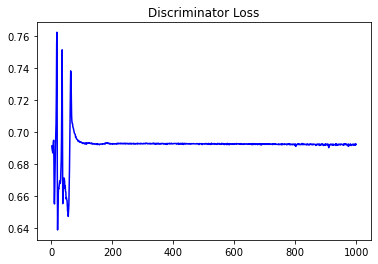

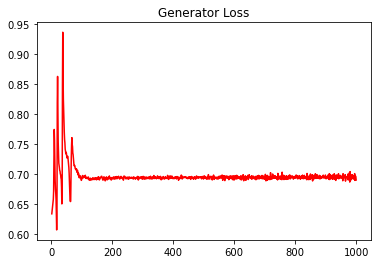

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.4614582736305892


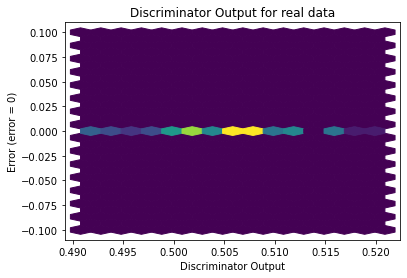

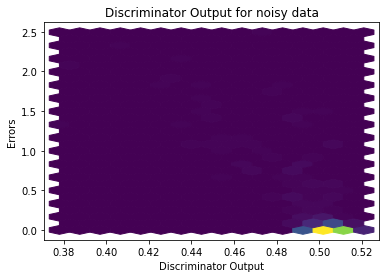

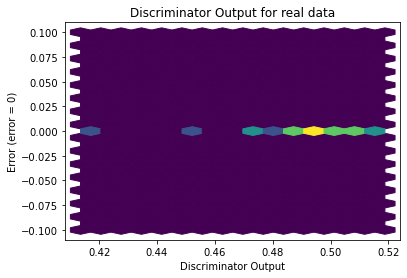

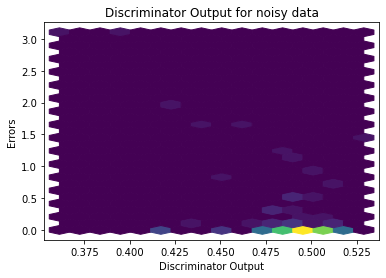

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

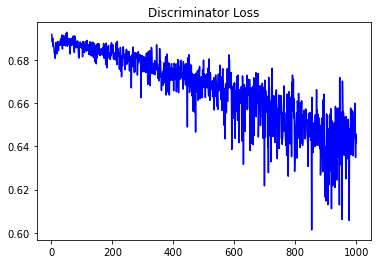

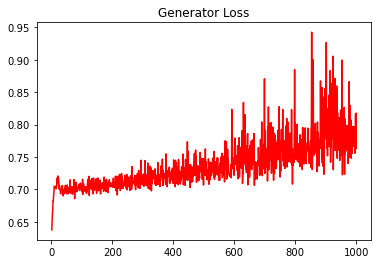

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5612561871558428


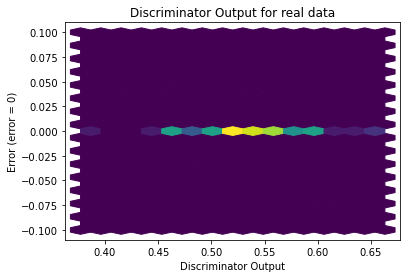

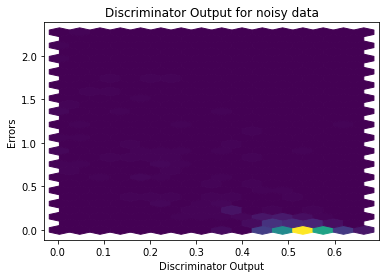

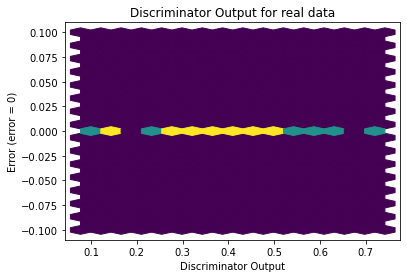

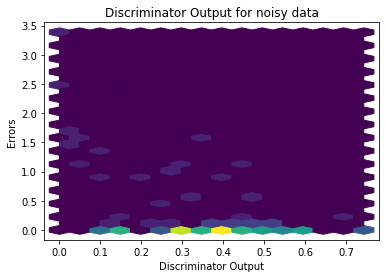

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


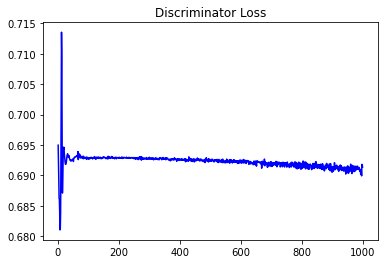

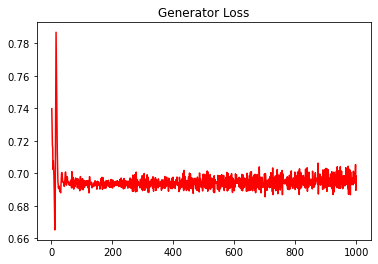

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4686987046460272


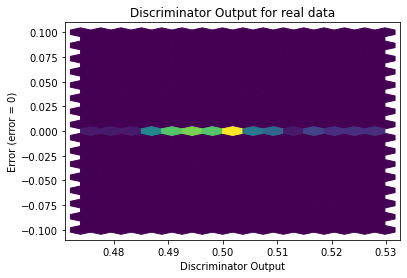

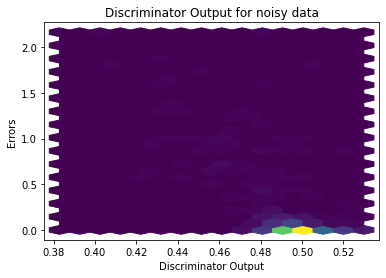

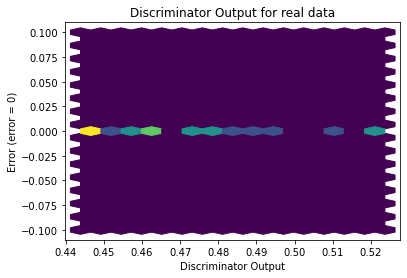

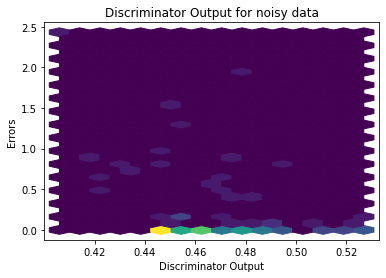

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


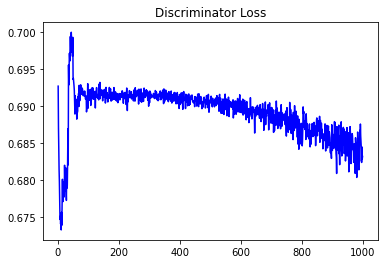

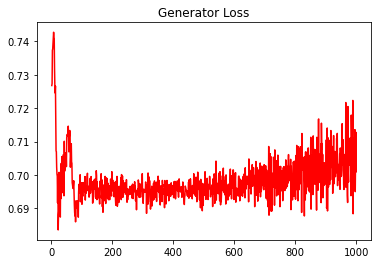

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.45918709863722323


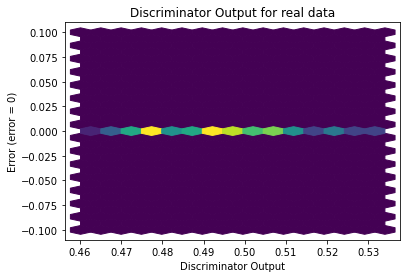

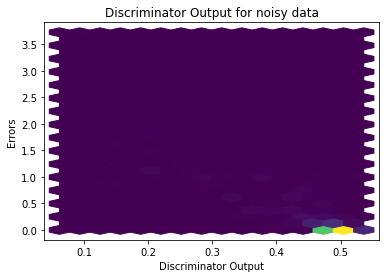

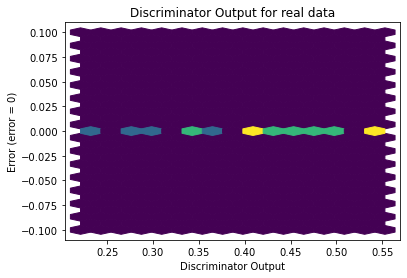

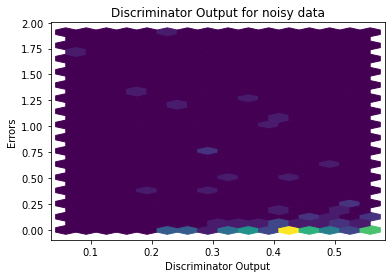

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5384]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0926]], requires_grad=True)
